# Exploratory Data Analysis of Brent Oil Prices

This notebook performs initial exploratory data analysis (EDA) on historical Brent oil price data to understand its time-series characteristics and prepare for change point analysis.


In [9]:
import os
import sys
from pathlib import Path

# Force project root
PROJECT_ROOT = Path(os.getcwd()).parent
sys.path.append(str(PROJECT_ROOT))

print("Project root:", PROJECT_ROOT)


Project root: c:\Users\hp\Documents\week11-change-point-analysis


In [10]:
from src.data_loader import load_brent_data

data_path = PROJECT_ROOT / "data" / "raw" / "brentoilprices.csv"
df = load_brent_data(data_path)
df.head()


c:\Users\hp\Documents\week11-change-point-analysis\src\data_loader.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


The Date column is converted to a datetime format and set as the index to enable proper time-series analysis and visualization.


In [11]:
from src.stationarity import adf_test, kpss_test

prices = df["Price"]

adf_result = adf_test(prices)
kpss_result = kpss_test(prices)

adf_result, kpss_result


c:\Users\hp\Documents\week11-change-point-analysis\src\stationarity.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, _, critical_values = kpss(series.dropna(), regression="c")


({'test_statistic': np.float64(-1.9938560113924675),
  'p_value': np.float64(0.28927350489340287),
  'critical_values': {'1%': np.float64(-3.4310783342658615),
   '5%': np.float64(-2.861861876398633),
   '10%': np.float64(-2.566941329781918)}},
 {'test_statistic': np.float64(9.558800416712556),
  'p_value': np.float64(0.01),
  'critical_values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}})

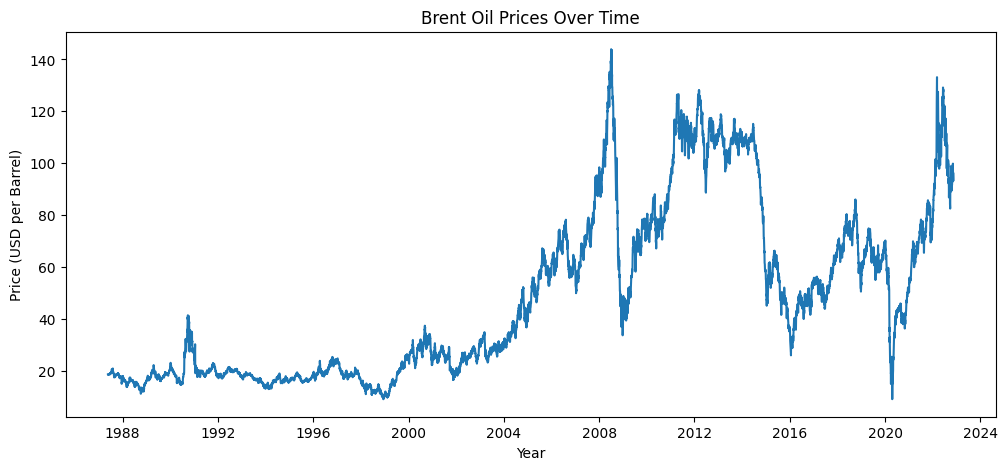

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df.index, df["Price"])
ax.set_title("Brent Oil Prices Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Price (USD per Barrel)")

fig.savefig(PROJECT_ROOT / "reports" / "figures" / "price_series.png")
plt.show()


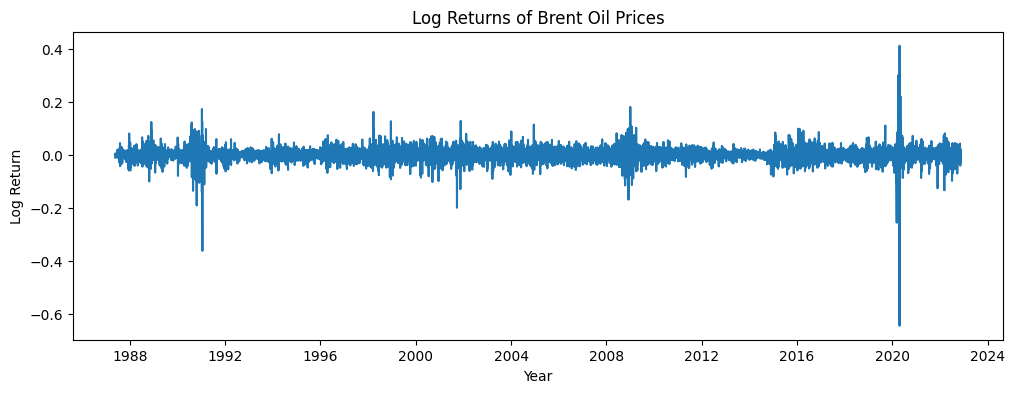

In [13]:
import numpy as np

df["log_return"] = np.log(df["Price"]).diff()

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.index, df["log_return"])
ax.set_title("Log Returns of Brent Oil Prices")
ax.set_xlabel("Year")
ax.set_ylabel("Log Return")

fig.savefig(PROJECT_ROOT / "reports" / "figures" / "log_returns.png")
plt.show()


### Stationarity Test Results

- The Augmented Dickey-Fuller (ADF) test fails to reject the null hypothesis, indicating non-stationarity in the raw price series.
- The KPSS test rejects the null hypothesis of stationarity, further confirming non-stationarity.
- These results justify transformation (log returns) and the use of change point modeling.
